In [26]:
!gdown 1kU64ckjel-CpAH352bwU5hWMFT_caZxZ

Downloading...
From (original): https://drive.google.com/uc?id=1kU64ckjel-CpAH352bwU5hWMFT_caZxZ
From (redirected): https://drive.google.com/uc?id=1kU64ckjel-CpAH352bwU5hWMFT_caZxZ&confirm=t&uuid=06cb5ddf-f336-4eeb-8a48-01fc60defb09
To: /content/card_fraud_detection.zip
100% 69.2M/69.2M [00:00<00:00, 131MB/s]


# Credit Card Fraud Detection


EPOCH 1:	Training loss: 11.735	Validation loss: 29.929

EPOCH 2:	Training loss: 11.578	Validation loss: 29.513

EPOCH 3:	Training loss: 11.422	Validation loss: 29.100

EPOCH 4:	Training loss: 11.269	Validation loss: 28.689

EPOCH 5:	Training loss: 11.117	Validation loss: 28.282

EPOCH 6:	Training loss: 10.967	Validation loss: 27.876

EPOCH 7:	Training loss: 10.819	Validation loss: 27.474

EPOCH 8:	Training loss: 10.673	Validation loss: 27.075

EPOCH 9:	Training loss: 10.529	Validation loss: 26.678

EPOCH 10:	Training loss: 10.386	Validation loss: 26.285

EPOCH 11:	Training loss: 10.246	Validation loss: 25.895

EPOCH 12:	Training loss: 10.107	Validation loss: 25.509

EPOCH 13:	Training loss: 9.970	Validation loss: 25.127

EPOCH 14:	Training loss: 9.835	Validation loss: 24.749

EPOCH 15:	Training loss: 9.703	Validation loss: 24.377

EPOCH 16:	Training loss: 9.573	Validation loss: 24.012

EPOCH 17:	Training loss: 9.447	Validation loss: 23.653

EPOCH 18:	Training loss: 9.325	Validation lo

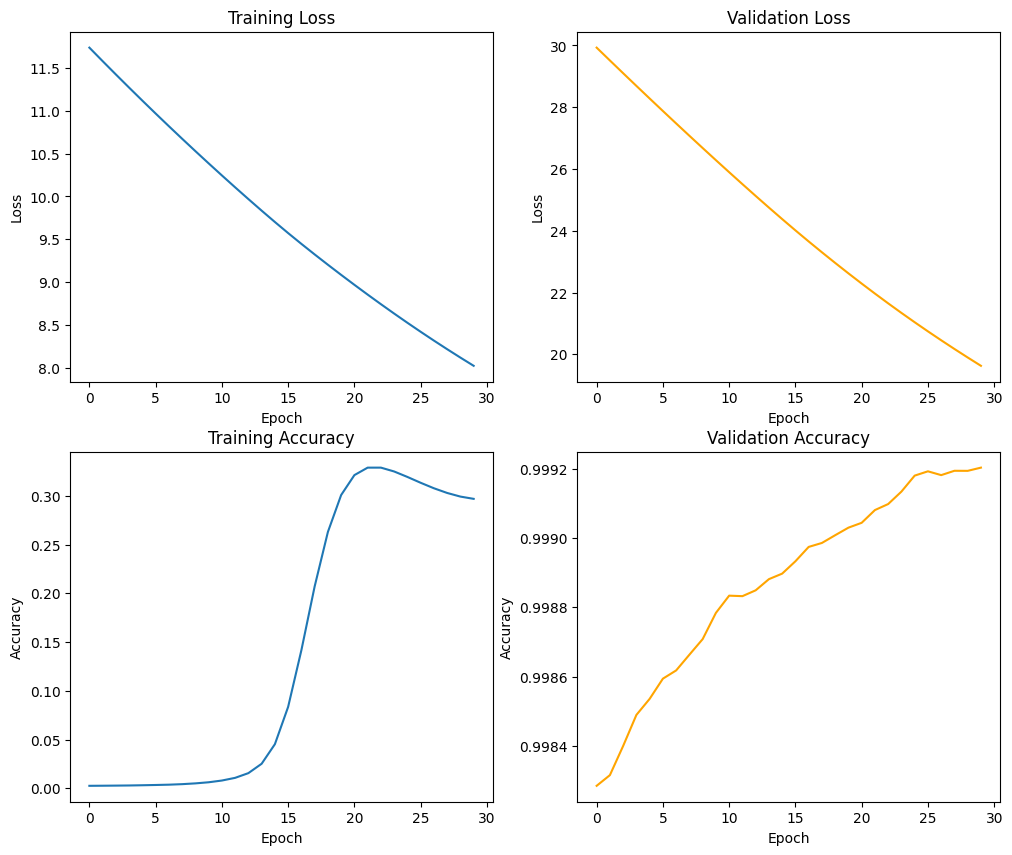

Evaluation on validation and test set:
Validation Accuracy: 0.9992099996488887
Test Accuracy: 0.0017204452090867595


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


def softmax(z):
    exp_z = np.exp(z)
    return exp_z / exp_z.sum(axis=0)


def predict(X, theta):
    z = np.dot(X, theta)
    y_hat = softmax(z)
    return y_hat


def compute_loss(y_hat, y):
    n = y.size
    return (-1 / n) * np.sum(y * np.log(y_hat))


def compute_gradient(X, y, y_hat):
    n = y.size
    return np.dot(X.T, (y_hat - y)) / n


def update_theta(theta, gradient, lr):
    return theta - lr * gradient


def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta)
    acc = (np.argmax(y_hat, axis=1) == np.argmax(y, axis=1)).mean()
    return acc


if __name__ == "__main__":
    dataset_path = '/content/card_fraud_detection.zip'
    df = pd.read_csv(dataset_path)

    dataset_arr = df.to_numpy()
    X, y = dataset_arr[:, :-1].astype(np.float64), dataset_arr[:, -1].astype(np.uint8)

    intercept = np.ones((X.shape[0], 1))
    X_b = np.concatenate((intercept, X), axis=1)

    n_classes = np.unique(y, axis=0).shape[0]
    n_samples = y.shape[0]

    y_encoded = np.array([np.zeros(n_classes) for _ in range(n_samples)])
    y_encoded[np.arange(n_samples), y] = 1

    val_size = 0.2
    test_size = 0.125
    random_state = 2
    is_shuffle = True

    X_train, X_val, y_train, y_val = train_test_split(
        X_b, y_encoded,
        test_size=val_size,
        random_state=random_state,
        shuffle=is_shuffle
    )

    X_train, X_test, y_train, y_test = train_test_split(
        X_train, y_train,
        test_size=test_size,
        random_state=random_state,
        shuffle=is_shuffle
    )

    normalizer = StandardScaler()
    X_train[:, 1:] = normalizer.fit_transform(X_train[:, 1:])
    X_val[:, 1:] = normalizer.transform(X_val[:, 1:])
    X_test[:, 1:] = normalizer.transform(X_test[:, 1:])

    lr = 0.01
    epochs = 30
    batch_size = 1024
    n_features = X_train.shape[1]

    np.random.seed(random_state)
    theta = np.random.uniform(size=(n_features, n_classes))

    train_accs = []
    train_losses = []
    val_accs = []
    val_losses = []

    for epoch in range(epochs):
        train_batch_losses = []
        train_batch_accs = []
        val_batch_losses = []
        val_batch_accs = []

        for i in range(0, X_train.shape[0], batch_size):
            X_i = X_train[i:i + batch_size]
            y_i = y_train[i:i + batch_size]

            y_hat = predict(X_i, theta)
            train_loss = compute_loss(y_hat, y_i)

            gradient = compute_gradient(X_i, y_i, y_hat)
            theta = update_theta(theta, gradient, lr)

            train_batch_losses.append(train_loss)
            train_acc = compute_accuracy(X_train, y_train, theta)
            train_batch_accs.append(train_acc)

            y_val_hat = predict(X_val, theta)
            val_loss = compute_loss(y_val_hat, y_val)
            val_batch_losses.append(val_loss)

            val_acc = compute_accuracy(X_val, y_val, theta)
            val_batch_accs.append(val_acc)

        train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
        val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
        train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
        val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

        train_losses.append(train_batch_loss)
        val_losses.append(val_batch_loss)
        train_accs.append(train_batch_acc)
        val_accs.append(val_batch_acc)

        print(f'\nEPOCH {epoch + 1}:\tTraining loss: {train_batch_loss:.3f}\tValidation loss: {val_batch_loss:.3f}')

    fig, ax = plt.subplots(2, 2, figsize=(12, 10))

    ax[0, 0].plot(train_losses)
    ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
    ax[0, 0].set_title('Training Loss')

    ax[0, 1].plot(val_losses, 'orange')
    ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
    ax[0, 1].set_title('Validation Loss')

    ax[1, 0].plot(train_accs)
    ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
    ax[1, 0].set_title('Training Accuracy')

    ax[1, 1].plot(val_accs, 'orange')
    ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
    ax[1, 1].set_title('Validation Accuracy')

    plt.show()

    val_set_acc = compute_accuracy(X_val, y_val, theta)
    test_set_acc = compute_accuracy(X_test, y_test, theta)
    print('Evaluation on validation and test set:')
    print(f'Validation Accuracy: {val_set_acc}')
    print(f'Test Accuracy: {test_set_acc}')

# Twitter Sentiment Analysis

In [30]:
!gdown 1e1uIwcJ1-MviSn9yk_ldPGffDWVp6yK_

Downloading...
From: https://drive.google.com/uc?id=1e1uIwcJ1-MviSn9yk_ldPGffDWVp6yK_
To: /content/twitter_sentiment_analysis_3cls_dataset.zip
100% 7.97M/7.97M [00:00<00:00, 19.4MB/s]


0.3120085853053626
[0.01314897 0.00483724 0.71790961 0.26410418]
0.5


In [32]:
dataset_path = '/content/twitter_sentiment_analysis_3cls_dataset.zip'
df = pd.read_csv(dataset_path)
df


,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [34]:
df = df. dropna ()
df

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [35]:
def text_normalize(text):
    # Lowercasing
    text = text.lower()

    # Retweet old acronym "RT" removal
    text = re.sub(r'^rt[\s]+', '', text)

    # Hyperlinks removal
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)

    # Punctuation removal
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))

    words = text.split()
    words = [word for word in words if word not in stop_words]
    text = ' '.join(words)

    # Stemming
    stemmer = SnowballStemmer('english')
    words = text.split()
    words = [stemmer.stem(word) for word in words]
    text = ' '.join(words)

    return text


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Khởi tạo vectorizer với số lượng đặc trưng tối đa là 2000
vectorizer = TfidfVectorizer(max_features=2000)

# Áp dụng vectorizer để chuyển đổi văn bản
X = vectorizer.fit_transform(df['clean_text']).toarray()


In [41]:
intercept = np. ones ((X. shape [0] , 1))
X_b = np. concatenate (( intercept , X) ,axis =1)
X_b

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [42]:
n_classes = df['category'].nunique()
n_samples = df['category'].size

y = df['category'].to_numpy() + 1
y = y.astype(np.uint8)
y_encoded = np.array([np.zeros(n_classes) for _ in range(n_samples)])
y_encoded[np.arange(n_samples), y] = 1


In [43]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(
    X_b, y_encoded,
    test_size=val_size,
    random_state=random_state,
    shuffle=is_shuffle
)

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size=test_size,
    random_state=random_state,
    shuffle=is_shuffle
)


In [44]:
lr = 0.1
epochs = 200
batch_size = X_train.shape[0]
n_features = X_train.shape[1]

np.random.seed(random_state)
theta = np.random.uniform(
    size=(n_features, n_classes)
)



EPOCH 1:	Training loss: 3.931	Validation loss: 3.514

EPOCH 2:	Training loss: 3.931	Validation loss: 3.514

EPOCH 3:	Training loss: 3.931	Validation loss: 3.514

EPOCH 4:	Training loss: 3.931	Validation loss: 3.514

EPOCH 5:	Training loss: 3.931	Validation loss: 3.514

EPOCH 6:	Training loss: 3.931	Validation loss: 3.514

EPOCH 7:	Training loss: 3.931	Validation loss: 3.514

EPOCH 8:	Training loss: 3.931	Validation loss: 3.514

EPOCH 9:	Training loss: 3.931	Validation loss: 3.514

EPOCH 10:	Training loss: 3.931	Validation loss: 3.514

EPOCH 11:	Training loss: 3.931	Validation loss: 3.514

EPOCH 12:	Training loss: 3.931	Validation loss: 3.514

EPOCH 13:	Training loss: 3.931	Validation loss: 3.514

EPOCH 14:	Training loss: 3.931	Validation loss: 3.514

EPOCH 15:	Training loss: 3.931	Validation loss: 3.514

EPOCH 16:	Training loss: 3.932	Validation loss: 3.514

EPOCH 17:	Training loss: 3.932	Validation loss: 3.514

EPOCH 18:	Training loss: 3.932	Validation loss: 3.514

EPOCH 19:	Training

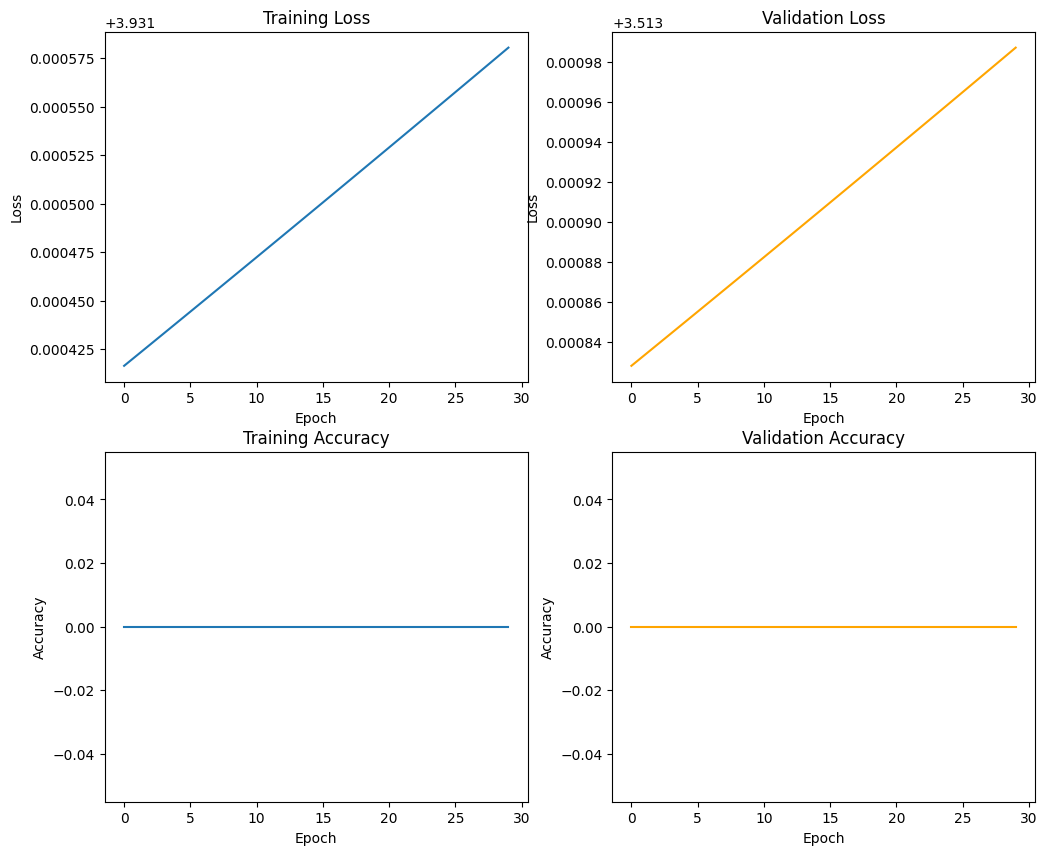

Evaluation on validation and test set:
Validation Accuracy: 0.0
Test Accuracy: 0.0


In [48]:
np.random.seed(random_state)
theta = np.random.uniform(size=(n_features, n_classes))

train_accs = []
train_losses = []
val_accs = []
val_losses = []
epochs = 30
for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []

    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i + batch_size]
        y_i = y_train[i:i + batch_size]

        y_hat = predict(X_i, theta)
        train_loss = compute_loss(y_hat, y_i)

        gradient = compute_gradient(X_i, y_i, y_hat)
        theta = update_theta(theta, gradient, lr)

        train_batch_losses.append(train_loss)

        # Tính độ chính xác trên batch hiện tại
        train_acc = compute_accuracy(y_i, y_hat)  # Chỉ truyền y_i và y_hat
        train_batch_accs.append(train_acc)

    # Tính dự đoán và độ chính xác trên tập validation
    y_val_hat = predict(X_val, theta)
    val_loss = compute_loss(y_val_hat, y_val)
    val_batch_losses.append(val_loss)

    val_acc = compute_accuracy(y_val, y_val_hat)  # Chỉ truyền y_val và y_val_hat
    val_batch_accs.append(val_acc)

    # Tính loss và accuracy cho mỗi epoch
    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)

    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)

    print(f'\nEPOCH {epoch + 1}:\tTraining loss: {train_batch_loss:.3f}\tValidation loss: {val_batch_loss:.3f}')

fig, ax = plt.subplots(2, 2, figsize=(12, 10))

ax[0, 0].plot(train_losses)
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, color='orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accs)
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accs, color='orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()

# Đánh giá trên tập validation và test set
y_val_hat = predict(X_val, theta)
val_set_acc = compute_accuracy(y_val, y_val_hat)  # Chỉ truyền y_val và y_val_hat

y_test_hat = predict(X_test, theta)
test_set_acc = compute_accuracy(y_test, y_test_hat)  # Chỉ truyền y_test và y_test_hat

print('Evaluation on validation and test set:')
print(f'Validation Accuracy: {val_set_acc}')
print(f'Test Accuracy: {test_set_acc}')
